# <div class = 'alert alert-info'> PAA - Ideal Price Prediction </div>

In [1]:
# Import Libraries

# Data Wrangling Libraries
import numpy as np
import pandas as pd

# Graphing/Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Pickle library
import pickle

# Miscellaneous libraries
import ast
import warnings
from datetime import datetime
import datetime as dt 
import calendar

In [2]:
# Ignoring all warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/rajathadri_as/Documents/Aug25_2023.csv')

## Firstview

In [4]:
df.head()

,id,main_id,item_type_id,guid,supertype_id,paa_step1,type_id,type_name,type_import,cat_id,...,performance,days_running,score,partnership_id,spidersnet,user_edited_on,createdby,createdon,editedby,editedon
0,47589,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,284,0,0,0,2023-07-04 19:20:11,johndoe177863,2015-06-26 15:14:51,(none),2023-08-23 23:43:03
1,47605,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,284,0,0,0,2023-07-04 19:20:11,johndoe177863,2015-06-26 15:14:52,(none),2023-08-23 23:43:03
2,517756,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,235,0,0,0,2023-07-04 19:20:11,cron_external,2015-08-14 07:50:27,(none),2023-08-23 23:43:03
3,517758,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,235,0,0,0,2023-07-04 19:20:09,cron_external,2015-08-14 07:50:28,(none),2023-08-23 23:43:03
4,536463,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,137,0,0,0,2023-07-04 19:30:12,cron_external,2015-11-20 06:40:20,(none),2023-08-23 23:43:03


In [5]:
df.shape

(20551, 359)

In [6]:
df.size

7377809

In [7]:
df.dropna(how='all', axis=1, inplace=True)

In [8]:
df.shape

(20551, 316)

In [9]:
df.head()

,id,main_id,item_type_id,guid,supertype_id,paa_step1,type_id,type_name,type_import,cat_id,...,performance,days_running,score,partnership_id,spidersnet,user_edited_on,createdby,createdon,editedby,editedon
0,47589,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,284,0,0,0,2023-07-04 19:20:11,johndoe177863,2015-06-26 15:14:51,(none),2023-08-23 23:43:03
1,47605,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,284,0,0,0,2023-07-04 19:20:11,johndoe177863,2015-06-26 15:14:52,(none),2023-08-23 23:43:03
2,517756,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,235,0,0,0,2023-07-04 19:20:11,cron_external,2015-08-14 07:50:27,(none),2023-08-23 23:43:03
3,517758,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,235,0,0,0,2023-07-04 19:20:09,cron_external,2015-08-14 07:50:28,(none),2023-08-23 23:43:03
4,536463,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,137,0,0,0,2023-07-04 19:30:12,cron_external,2015-11-20 06:40:20,(none),2023-08-23 23:43:03


In [10]:
df.isnull().sum()

id                  0
main_id             0
item_type_id        0
guid              245
supertype_id        0
                 ... 
user_edited_on      0
createdby           0
createdon           0
editedby            3
editedon            0
Length: 316, dtype: int64

In [11]:
# Loop through each column and drop if NULL count exceeds the threshold
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 20000:
        df.drop(column, axis=1, inplace=True)

In [12]:
df.shape

(20551, 296)

In [13]:
df.columns

Index(['id', 'main_id', 'item_type_id', 'guid', 'supertype_id', 'paa_step1',
       'type_id', 'type_name', 'type_import', 'cat_id',
       ...
       'performance', 'days_running', 'score', 'partnership_id', 'spidersnet',
       'user_edited_on', 'createdby', 'createdon', 'editedby', 'editedon'],
      dtype='object', length=296)

In [14]:
df.head(3)

,id,main_id,item_type_id,guid,supertype_id,paa_step1,type_id,type_name,type_import,cat_id,...,performance,days_running,score,partnership_id,spidersnet,user_edited_on,createdby,createdon,editedby,editedon
0,47589,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,284,0,0,0,2023-07-04 19:20:11,johndoe177863,2015-06-26 15:14:51,(none),2023-08-23 23:43:03
1,47605,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,284,0,0,0,2023-07-04 19:20:11,johndoe177863,2015-06-26 15:14:52,(none),2023-08-23 23:43:03
2,517756,0,0,NaN,0,type_id:1;,1,Touring Caravans,0,76,...,1,235,0,0,0,2023-07-04 19:20:11,cron_external,2015-08-14 07:50:27,(none),2023-08-23 23:43:03


In [15]:
# Drop features with dtype 'object'
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['guid', 'paa_step1', 'type_name', 'cat_name', 'ad_sold_on',
       'email_magazineon', 'suspendedon', 'username', 'hp_start_on', 'title',
       'region_name', 'county_name', 'postal_code', 'start_on', 'end_on',
       'yac_number_on', 'approvedby', 'approvedon', 'almost_expired_date',
       'top_ad_end', 'blinking_end', 'highlighted_end', 'homepage_end',
       'urgent_end', 'privacy_number_end', 'search_string', 'hp_path',
       'hp2_path', 'img_path', 'featured_path', 'small_path', 'verysmall_path',
       'contact_preferences', 'boost_end', 'hppremium_end', 'caotw_end',
       'magazine2_end', 'icon_end', 'magazine_end', 'video_end', 'engine',
       'width', 'berth', 'ready_by', 'dob', 'umphotos_end', 'ip', 'ip_country',
       'currency', 'country', 'features', 'seller_type', 'year', 'length',
       'newused', 'trusted_end', 'city_name', 'ad_origin', 'sns_update_date',
       'name', 'email', 'youtube_video', 'advertcode', 'phone', 'url',
       'make_name', 'model_name

In [16]:
df.drop(object_columns, axis=1, inplace=True)

In [17]:
df.shape

(20551, 213)

In [18]:
df.columns

Index(['id', 'main_id', 'item_type_id', 'supertype_id', 'type_id',
       'type_import', 'cat_id', 'subcat_id', 'altcat_id', 'racegroup_id',
       ...
       'position_cat', 'tax_options', 'disable_reviews', 'email_archived',
       'email_service_suggestion', 'performance', 'days_running', 'score',
       'partnership_id', 'spidersnet'],
      dtype='object', length=213)

In [19]:
df.head()

,id,main_id,item_type_id,supertype_id,type_id,type_import,cat_id,subcat_id,altcat_id,racegroup_id,...,position_cat,tax_options,disable_reviews,email_archived,email_service_suggestion,performance,days_running,score,partnership_id,spidersnet
0,47589,0,0,0,1,0,76,0,0,0,...,0,NaN,0,0,0,1,284,0,0,0
1,47605,0,0,0,1,0,76,0,0,0,...,0,NaN,0,0,0,1,284,0,0,0
2,517756,0,0,0,1,0,76,0,0,0,...,0,NaN,0,0,0,1,235,0,0,0
3,517758,0,0,0,1,0,76,0,0,0,...,0,NaN,0,0,0,1,235,0,0,0
4,536463,0,0,0,1,0,76,0,0,0,...,0,NaN,0,0,0,1,137,0,0,0


In [20]:
id_columns = [column for column in df.columns if 'id' in column]
id_columns

['id',
 'main_id',
 'item_type_id',
 'supertype_id',
 'type_id',
 'cat_id',
 'subcat_id',
 'altcat_id',
 'racegroup_id',
 'race_id',
 'race_name_id',
 'user_id',
 'country_id',
 'fad_region_id',
 'fad_county_id',
 'fad_county_name_id',
 'region_id',
 'county_id',
 'city_id',
 'hp_width',
 'hp2_width',
 'img_width',
 'featured_width',
 'small_width',
 'verysmall_width',
 'icon_width',
 'locality_id',
 'pitch_type_id',
 'video_active',
 'berth_id',
 'package_id',
 'donation_id',
 'currency_id',
 'status_id',
 'bedrooms_id',
 'seller_type_id',
 'pulltype_id',
 'year_id',
 'length_id',
 'newused_id',
 'brand_id',
 'city_name_id',
 'campaign_id',
 'device_id',
 'advert_type_id',
 'make_id',
 'make2_id',
 'make_name_id',
 'model_id',
 'age_id',
 'height_id',
 'gender_id',
 'price_id',
 'price2_id',
 'price_descr_id',
 'colour_id',
 'nhorses_id',
 'living_id',
 'typepos_id',
 'video',
 'voucher_id',
 'import_id',
 'instance_id',
 'video_id',
 'api_import_id',
 'external_altcatid',
 'external_

In [21]:
id_columns.remove('type_id')
id_columns.remove('cat_id')
id_columns.remove('package_id')
id_columns

['id',
 'main_id',
 'item_type_id',
 'supertype_id',
 'subcat_id',
 'altcat_id',
 'racegroup_id',
 'race_id',
 'race_name_id',
 'user_id',
 'country_id',
 'fad_region_id',
 'fad_county_id',
 'fad_county_name_id',
 'region_id',
 'county_id',
 'city_id',
 'hp_width',
 'hp2_width',
 'img_width',
 'featured_width',
 'small_width',
 'verysmall_width',
 'icon_width',
 'locality_id',
 'pitch_type_id',
 'video_active',
 'berth_id',
 'donation_id',
 'currency_id',
 'status_id',
 'bedrooms_id',
 'seller_type_id',
 'pulltype_id',
 'year_id',
 'length_id',
 'newused_id',
 'brand_id',
 'city_name_id',
 'campaign_id',
 'device_id',
 'advert_type_id',
 'make_id',
 'make2_id',
 'make_name_id',
 'model_id',
 'age_id',
 'height_id',
 'gender_id',
 'price_id',
 'price2_id',
 'price_descr_id',
 'colour_id',
 'nhorses_id',
 'living_id',
 'typepos_id',
 'video',
 'voucher_id',
 'import_id',
 'instance_id',
 'video_id',
 'api_import_id',
 'external_altcatid',
 'external_altcatid_id',
 'external_altcatid_acti

In [22]:
df.drop(id_columns, axis=1, inplace=True)

In [23]:
df.shape

(20551, 145)

In [24]:
df.head()

,type_id,type_import,cat_id,type_ad,active,auto_renew,ad_sold,unclaimed,product,email_magazine,...,eyb,position,position_cat,tax_options,disable_reviews,email_archived,email_service_suggestion,performance,days_running,score
0,1,0,76,0,1,0,0,0,0,0,...,0,0,0,NaN,0,0,0,1,284,0
1,1,0,76,0,1,0,0,0,0,0,...,0,0,0,NaN,0,0,0,1,284,0
2,1,0,76,0,1,0,0,0,0,0,...,0,2000,0,NaN,0,0,0,1,235,0
3,1,0,76,0,1,0,0,0,0,0,...,0,2000,0,NaN,0,0,0,1,235,0
4,1,0,76,0,1,0,0,0,0,0,...,0,2000,0,NaN,0,0,0,1,137,0


In [25]:
pd.set_option('display.max_columns', 200)

In [26]:
df.head()

,type_id,type_import,cat_id,type_ad,active,auto_renew,ad_sold,unclaimed,product,email_magazine,suspended,hp,never_expires,renew,renewed_from,renewed_to,pre_moderate,post_moderate,yac_number_active,approved,user_active,almost_expired,days,top_ad,top_ad_active,highlighted,blinking,homepage,blinking_active,highlighted_active,homepage_active,urgent_active,privacy_number,privacy_number_active,cost,subscribe_premium,payed_type,payed,hp_height,hp2_height,img_height,featured_height,small_height,verysmall_height,icon_height,s3_active,watermark_active,boost,boost_active,hppremium,hppremium_active,caotw,caotw_active,magazine2_active,magazine2,icon_active,icon,magazine_active,magazine,landleased,sited,umphotos,umphotos_active,package_id,package_renewed,paying_trader,premium_ad,photo,num_photos,bedrooms,stock_number,axles,trusted,trusted_active,coupon_discount,map_on_ad,reply_me,newsletter,newsletter_third_parties,secondary_site,urgent,age,height,price,price_original,price2,nhorses,trailer,mileage,living,risk_score,doors,trade,wanted,new,upsell_1_cup,upsell_2_rosette,upsell_3_learner,stud_facilities,emailable,favs,enable_maps,lat_decimal,long_decimal,lock_map,analytics_display,reviews,views,views_week,views_day,business_url_click,views_map,contacts,displays,displays_hl,displays_hp,displays_hppremium,views_photo,url_click,print_click,print_phone,print_mobile,likes,dream_stable,from_news,from_advice,updated_views,twitter,twitted,facebook,facebooked,imported,show_ads_on_primary_site,imported_adbox,photos_removed,eyb,position,position_cat,tax_options,disable_reviews,email_archived,email_service_suggestion,performance,days_running,score
0,1,0,76,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,30,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,130,70,190,96,84,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,57,0,1,1,1,8,NaN,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0.0,1699500,1699500,1699500,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,51.667193,-4.021983,0,0,0,11745,11745,0,0,0,2,70465,0,9,0,26830,0,53,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0,0,0,1,284,0
1,1,0,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,30,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,130,70,190,96,84,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,57,0,1,1,1,0,NaN,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0.0,1778500,1778500,1778500,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,51.667193,-4.021983,0,0,0,3109,3109,0,0,0,0,53908,0,0,0,5,0,39,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0,0,0,1,284,0
2,1,0,76,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,90,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,130,70,190,96,84,81,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,57,0,1,1,1,5,NaN,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0.0,1249500,1249500,1249500,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,51.667193,-4.021983,0,0,0,7528,7528,0,0,0,3,65337,0,8,157,21390,0,49,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2000,0,NaN,0,0,0,1,235,0
3,1,0,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,90,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,130,70,190,96,84,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,57,0,1,1,1,0,NaN,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0.0,1689500,1689500,1689500,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,51.667193,-4.021983,0,0,0,3254,3254,0,0,0,0,66459,0,0,0,22,0,53,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2000,0,NaN,0,0,0,1,235,0
4,1,0,76,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,90,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,130,70,190,96,84,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,57,0,1,1,1,6,NaN,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0.0,1289500,1289500,1289500,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,51.667193,-4.021983,0,0,0,1561,1561,0,0,0,2,53046,0,5,0,2984,0,41,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2000,0,NaN,0,0,0,1,137,0


In [27]:
df.isnull().sum()

type_id                     0
type_import                 0
cat_id                      0
type_ad                     0
active                      0
                           ..
email_archived              0
email_service_suggestion    0
performance                 0
days_running                0
score                       0
Length: 145, dtype: int64

In [28]:
# Drop columns with only 1 unique value
unique_counts = df.nunique()
columns_to_drop = unique_counts[unique_counts == 1].index
columns_to_drop

Index(['type_import', 'type_ad', 'unclaimed', 'product', 'email_magazine',
       'yac_number_active', 'blinking', 'blinking_active', 'privacy_number',
       'privacy_number_active', 'subscribe_premium', 'payed_type', 'payed',
       's3_active', 'magazine2_active', 'magazine2', 'icon_active', 'icon',
       'magazine_active', 'magazine', 'stock_number', 'axles', 'trusted',
       'trusted_active', 'age', 'height', 'nhorses', 'trailer', 'living',
       'risk_score', 'wanted', 'upsell_1_cup', 'upsell_2_rosette',
       'upsell_3_learner', 'stud_facilities', 'reviews', 'views_day',
       'views_map', 'displays_hl', 'print_mobile', 'likes', 'dream_stable',
       'from_news', 'from_advice', 'updated_views', 'twitter', 'twitted',
       'facebook', 'facebooked', 'show_ads_on_primary_site', 'imported_adbox',
       'eyb', 'tax_options', 'disable_reviews', 'email_archived', 'score'],
      dtype='object')

In [29]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [30]:
df.shape

(20551, 89)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551 entries, 0 to 20550
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type_id                   20551 non-null  int64  
 1   cat_id                    20551 non-null  int64  
 2   active                    20551 non-null  int64  
 3   auto_renew                20551 non-null  int64  
 4   ad_sold                   20551 non-null  int64  
 5   suspended                 20551 non-null  int64  
 6   hp                        20551 non-null  int64  
 7   never_expires             20551 non-null  int64  
 8   renew                     20551 non-null  int64  
 9   renewed_from              20551 non-null  int64  
 10  renewed_to                20551 non-null  int64  
 11  pre_moderate              20551 non-null  int64  
 12  post_moderate             20551 non-null  int64  
 13  approved                  20551 non-null  int64  
 14  user_a

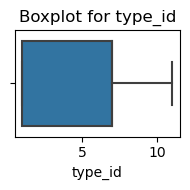

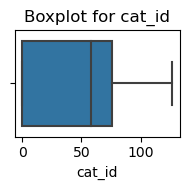

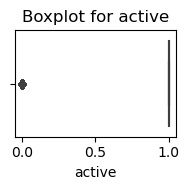

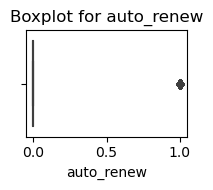

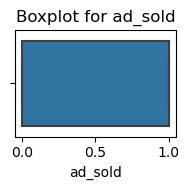

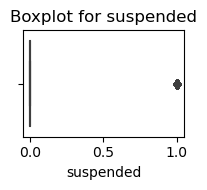

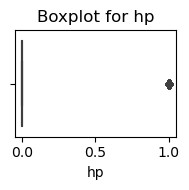

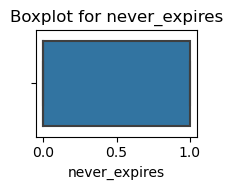

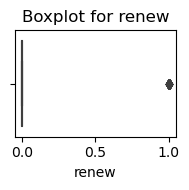

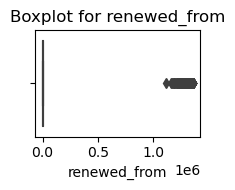

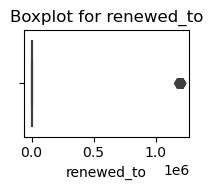

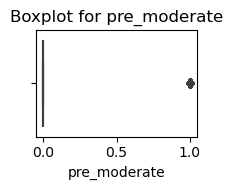

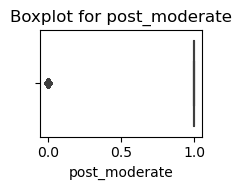

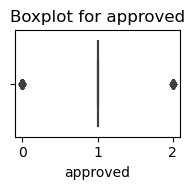

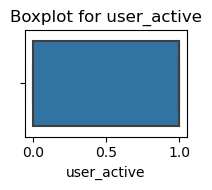

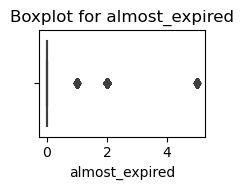

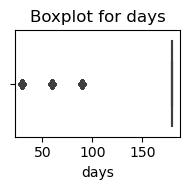

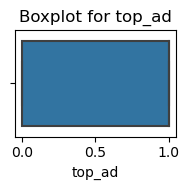

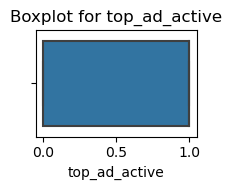

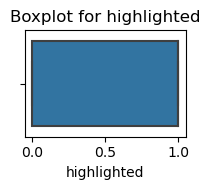

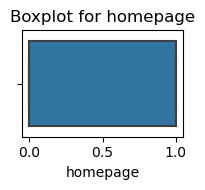

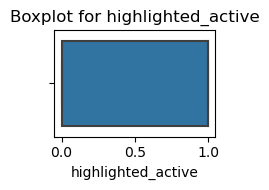

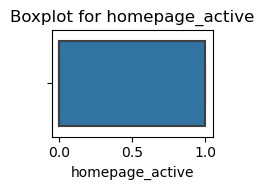

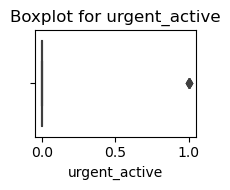

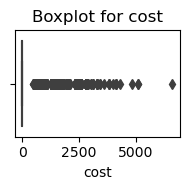

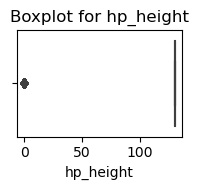

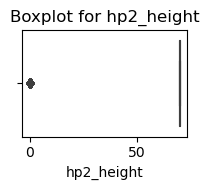

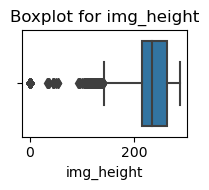

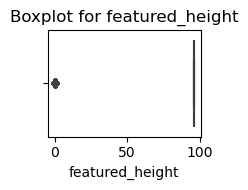

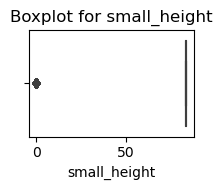

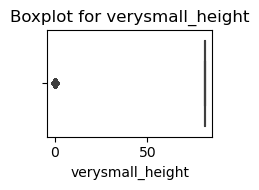

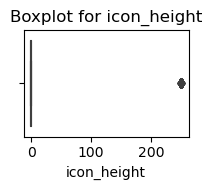

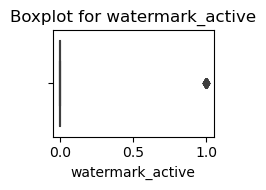

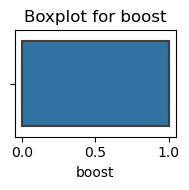

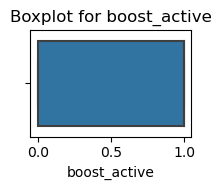

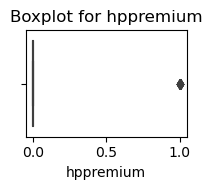

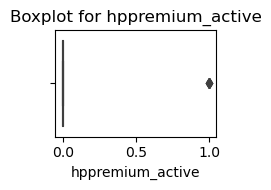

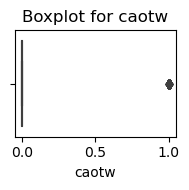

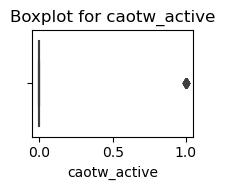

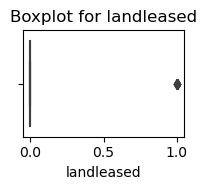

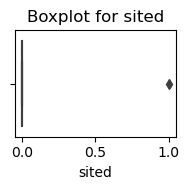

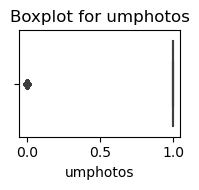

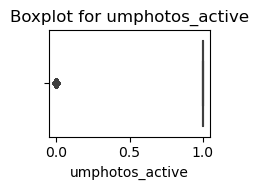

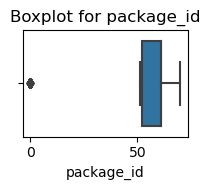

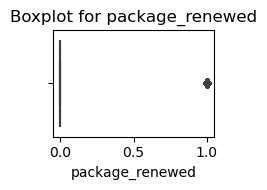

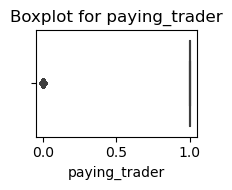

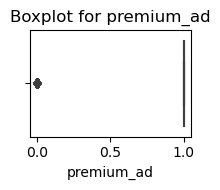

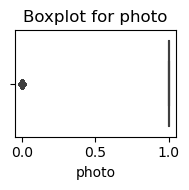

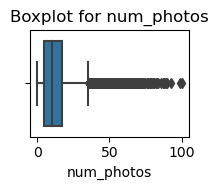

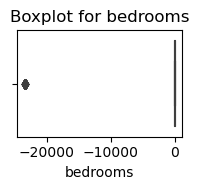

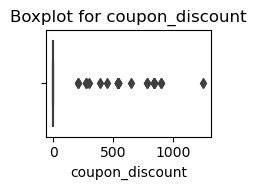

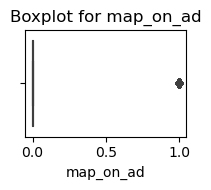

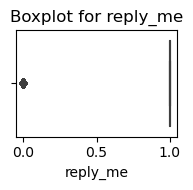

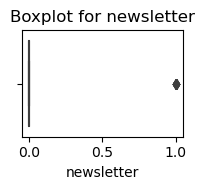

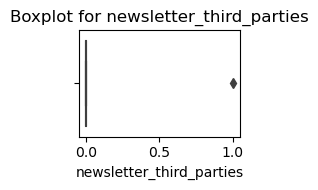

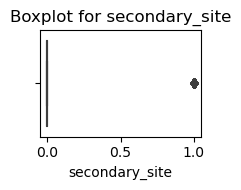

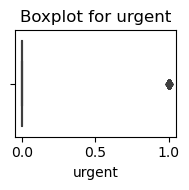

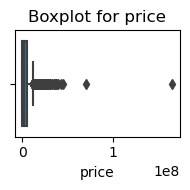

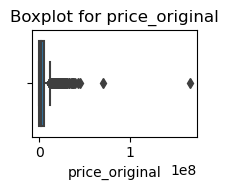

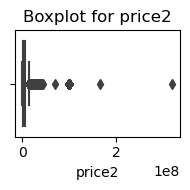

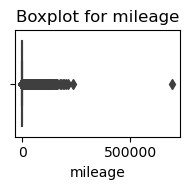

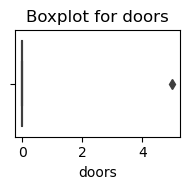

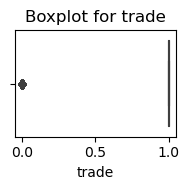

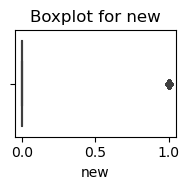

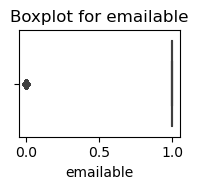

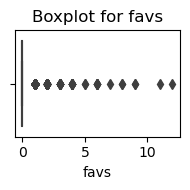

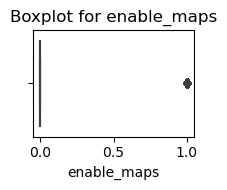

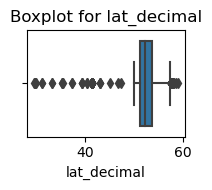

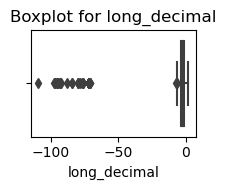

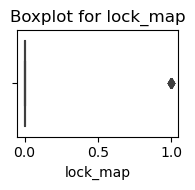

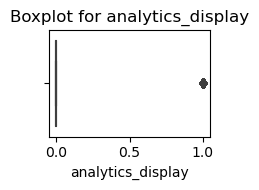

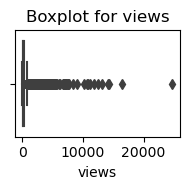

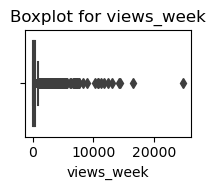

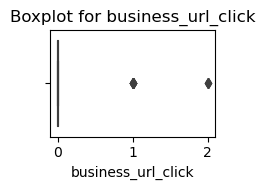

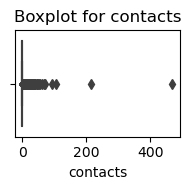

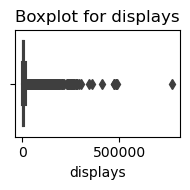

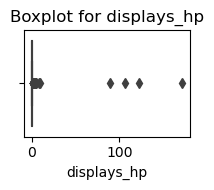

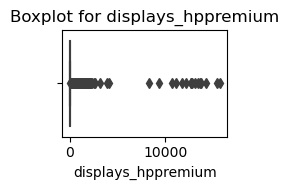

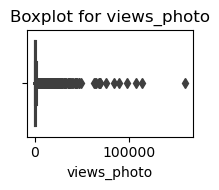

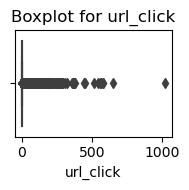

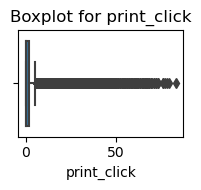

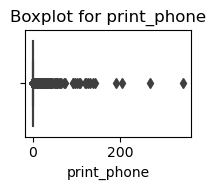

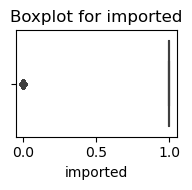

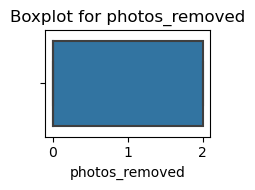

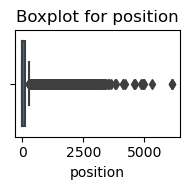

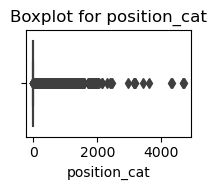

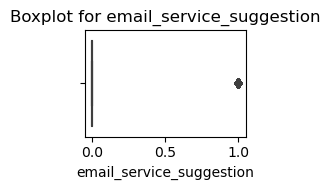

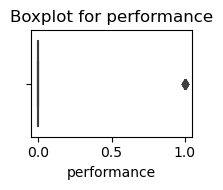

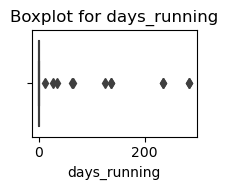

In [32]:
for column in df.columns:
    plt.figure(figsize=(2, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()
    plt.show()

## Feature Engineering

In [33]:
df.columns

Index(['type_id', 'cat_id', 'active', 'auto_renew', 'ad_sold', 'suspended',
       'hp', 'never_expires', 'renew', 'renewed_from', 'renewed_to',
       'pre_moderate', 'post_moderate', 'approved', 'user_active',
       'almost_expired', 'days', 'top_ad', 'top_ad_active', 'highlighted',
       'homepage', 'highlighted_active', 'homepage_active', 'urgent_active',
       'cost', 'hp_height', 'hp2_height', 'img_height', 'featured_height',
       'small_height', 'verysmall_height', 'icon_height', 'watermark_active',
       'boost', 'boost_active', 'hppremium', 'hppremium_active', 'caotw',
       'caotw_active', 'landleased', 'sited', 'umphotos', 'umphotos_active',
       'package_id', 'package_renewed', 'paying_trader', 'premium_ad', 'photo',
       'num_photos', 'bedrooms', 'coupon_discount', 'map_on_ad', 'reply_me',
       'newsletter', 'newsletter_third_parties', 'secondary_site', 'urgent',
       'price', 'price_original', 'price2', 'mileage', 'doors', 'trade', 'new',
       'emailable'

In [34]:
unwanted_features = ['renewed_from','renewed_to','hp_height', 'hp2_height', 'img_height','landleased', 'sited','bedrooms', 'coupon_discount','mileage', 'doors']

In [35]:
df.drop(columns=unwanted_features,inplace=True)

In [36]:
df.shape

(20551, 78)

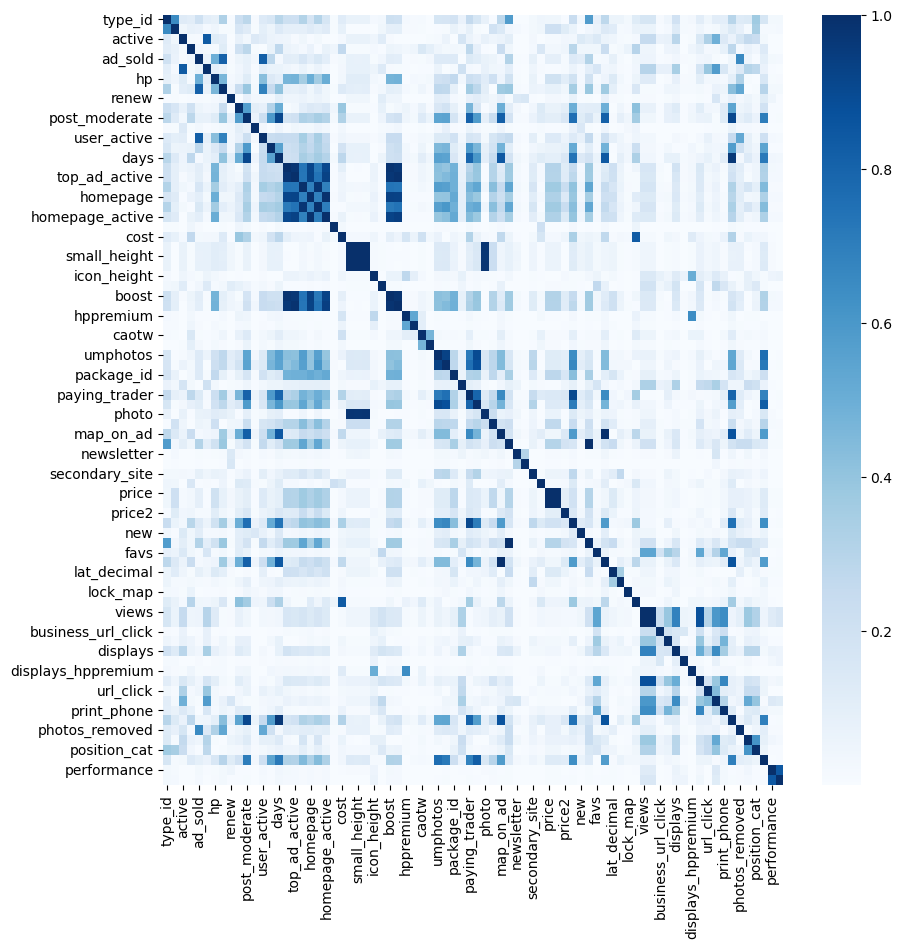

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(np.abs(df.corr()), cmap= 'Blues',ax=ax)
plt.show()

In [38]:
df.columns

Index(['type_id', 'cat_id', 'active', 'auto_renew', 'ad_sold', 'suspended',
       'hp', 'never_expires', 'renew', 'pre_moderate', 'post_moderate',
       'approved', 'user_active', 'almost_expired', 'days', 'top_ad',
       'top_ad_active', 'highlighted', 'homepage', 'highlighted_active',
       'homepage_active', 'urgent_active', 'cost', 'featured_height',
       'small_height', 'verysmall_height', 'icon_height', 'watermark_active',
       'boost', 'boost_active', 'hppremium', 'hppremium_active', 'caotw',
       'caotw_active', 'umphotos', 'umphotos_active', 'package_id',
       'package_renewed', 'paying_trader', 'premium_ad', 'photo', 'num_photos',
       'map_on_ad', 'reply_me', 'newsletter', 'newsletter_third_parties',
       'secondary_site', 'urgent', 'price', 'price_original', 'price2',
       'trade', 'new', 'emailable', 'favs', 'enable_maps', 'lat_decimal',
       'long_decimal', 'lock_map', 'analytics_display', 'views', 'views_week',
       'business_url_click', 'contacts',

In [39]:
df.describe()


,type_id,cat_id,active,auto_renew,ad_sold,suspended,hp,never_expires,renew,pre_moderate,post_moderate,approved,user_active,almost_expired,days,top_ad,top_ad_active,highlighted,homepage,highlighted_active,homepage_active,urgent_active,cost,featured_height,small_height,verysmall_height,icon_height,watermark_active,boost,boost_active,hppremium,hppremium_active,caotw,caotw_active,umphotos,umphotos_active,package_id,package_renewed,paying_trader,premium_ad,photo,num_photos,map_on_ad,reply_me,newsletter,newsletter_third_parties,secondary_site,urgent,price,price_original,price2,trade,new,emailable,favs,enable_maps,lat_decimal,long_decimal,lock_map,analytics_display,views,views_week,business_url_click,contacts,displays,displays_hp,displays_hppremium,views_photo,url_click,print_click,print_phone,imported,photos_removed,position,position_cat,email_service_suggestion,performance,days_running
count,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,2.055100e+04,2.055100e+04,2.055100e+04,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20544.000000,20544.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.00000,20551.000000,20551.000000,20551.000000,20551.000000
mean,5.142572,35.873826,0.943360,0.021507,0.507761,0.040533,0.192594,0.396574,0.001946,0.092502,0.786336,0.997616,0.567466,0.186901,153.065544,0.516520,0.506155,0.655735,0.478711,0.646587,0.474478,0.000195,60.028806,91.202569,79.830860,76.952168,1.411124,0.001508,0.509367,0.501533,0.000681,0.000195,0.004963,0.001119,0.854070,0.836115,57.454284,0.031775,0.784390,0.852513,0.947934,12.581675,0.189918,0.805314,0.000535,0.000049,0.021264,0.004477,2.876669e+06,2.876664e+06,1.096963e+07,0.815337,0.011435,0.805314,0.048027,0.190988,52.553031,-2.378856,0.000584,0.034159,275.238188,275.238188,0.000681,0.468785,9024.387524,0.027152,18.247531,1101.519245,3.284366,2.385967,0.843755,0.781665,0.662547,402.47696,171.961267,0.119313,0.000535,0.079461
std,3.381676,34.782681,0.231158,0.145072,0.499952,0.197211,0.394346,0.489198,0.044076,0.289740,0.409902,0.066502,0.495439,0.607540,51.538128,0.499739,0.499974,0.475140,0.499559,0.478041,0.499360,0.013950,340.712995,20.917918,18.243965,17.649494,18.729834,0.038810,0.499924,0.500010,0.026092,0.013950,0.070277,0.033436,0.353044,0.370180,6.118747,0.175404,0.411255,0.354599,0.222165,12.808590,0.392245,0.395969,0.023130,0.006976,0.144267,0.066760,3.620770e+06,3.620772e+06,2.671734e+07,0.388033,0.106324,0.395969,0.316889,0.393089,1.827823,5.006570,0.024158,0.181642,580.782533,580.782533,0.031189,4.241756,20901.965094,1.769337,372.947548,3627.801358,20.840241,7.165382,5.405500,0.413126,0.941365,777.63098,530.250696,0.324164,0.023130,4.033179
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,29.691345,-109.246821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [40]:
df.shape

(20551, 78)

In [41]:
columns_with_nulls = df.columns[df.isnull().any()]
print(df[columns_with_nulls])

       lat_decimal  long_decimal
0        51.667193     -4.021983
1        51.667193     -4.021983
2        51.667193     -4.021983
3        51.667193     -4.021983
4        51.667193     -4.021983
...            ...           ...
20546    52.997163     -1.281457
20547    51.285558     -0.745298
20548    52.821632     -1.147234
20549    51.557886     -3.338495
20550    50.726665     -1.610562

[20551 rows x 2 columns]


In [42]:
df.drop(columns=['lat_decimal','long_decimal'],inplace=True)

In [43]:
df.columns

Index(['type_id', 'cat_id', 'active', 'auto_renew', 'ad_sold', 'suspended',
       'hp', 'never_expires', 'renew', 'pre_moderate', 'post_moderate',
       'approved', 'user_active', 'almost_expired', 'days', 'top_ad',
       'top_ad_active', 'highlighted', 'homepage', 'highlighted_active',
       'homepage_active', 'urgent_active', 'cost', 'featured_height',
       'small_height', 'verysmall_height', 'icon_height', 'watermark_active',
       'boost', 'boost_active', 'hppremium', 'hppremium_active', 'caotw',
       'caotw_active', 'umphotos', 'umphotos_active', 'package_id',
       'package_renewed', 'paying_trader', 'premium_ad', 'photo', 'num_photos',
       'map_on_ad', 'reply_me', 'newsletter', 'newsletter_third_parties',
       'secondary_site', 'urgent', 'price', 'price_original', 'price2',
       'trade', 'new', 'emailable', 'favs', 'enable_maps', 'lock_map',
       'analytics_display', 'views', 'views_week', 'business_url_click',
       'contacts', 'displays', 'displays_hp', 'di

In [44]:
df.drop(columns=['days_running','almost_expired','days','package_renewed'],inplace=True)

## Data Pre-processing

In [45]:
data_dummy=pd.get_dummies(df,drop_first=True)
data_dummy.shape

(20551, 72)

In [46]:
y=data_dummy['cost']                 # dependent variable
X=data_dummy.drop(columns='cost')    # independent variables

In [47]:
X.head()

,type_id,cat_id,active,auto_renew,ad_sold,suspended,hp,never_expires,renew,pre_moderate,post_moderate,approved,user_active,top_ad,top_ad_active,highlighted,homepage,highlighted_active,homepage_active,urgent_active,featured_height,small_height,verysmall_height,icon_height,watermark_active,boost,boost_active,hppremium,hppremium_active,caotw,caotw_active,umphotos,umphotos_active,package_id,paying_trader,premium_ad,photo,num_photos,map_on_ad,reply_me,newsletter,newsletter_third_parties,secondary_site,urgent,price,price_original,price2,trade,new,emailable,favs,enable_maps,lock_map,analytics_display,views,views_week,business_url_click,contacts,displays,displays_hp,displays_hppremium,views_photo,url_click,print_click,print_phone,imported,photos_removed,position,position_cat,email_service_suggestion,performance
0,1,76,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,8,0,1,0,0,0,0,1699500,1699500,1699500,1,0,1,0,0,0,0,11745,11745,0,2,70465,9,0,26830,0,53,17,1,0,0,0,0,1
1,1,76,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,0,0,1,0,0,0,0,1778500,1778500,1778500,1,0,1,0,0,0,0,3109,3109,0,0,53908,0,0,5,0,39,3,1,0,0,0,0,1
2,1,76,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,250,0,0,0,0,0,0,0,1,1,57,1,1,1,5,0,1,0,0,0,0,1249500,1249500,1249500,1,0,1,1,0,0,0,7528,7528,0,3,65337,8,157,21390,0,49,9,1,0,2000,0,0,1
3,1,76,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,0,0,1,0,0,0,0,1689500,1689500,1689500,1,0,1,0,0,0,0,3254,3254,0,0,66459,0,0,22,0,53,5,1,0,2000,0,0,1
4,1,76,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,6,0,1,0,0,0,0,1289500,1289500,1289500,1,0,1,0,0,0,0,1561,1561,0,2,53046,5,0,2984,0,41,1,1,0,2000,0,0,1


In [48]:
scaler=StandardScaler()   # Preprocessing step - Stanadardization;     Mean = 0;     Std dev = 1;
scaler.fit(X)             # learns the parameters of the model that best fit the data
x=scaler.transform(X)     # This step is important to ensure that the new data is in the same format

In [49]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# <div class = 'alert alert-info'>Linear Regression</div>

In [50]:
# Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [51]:
yhat=reg.predict(x_train)

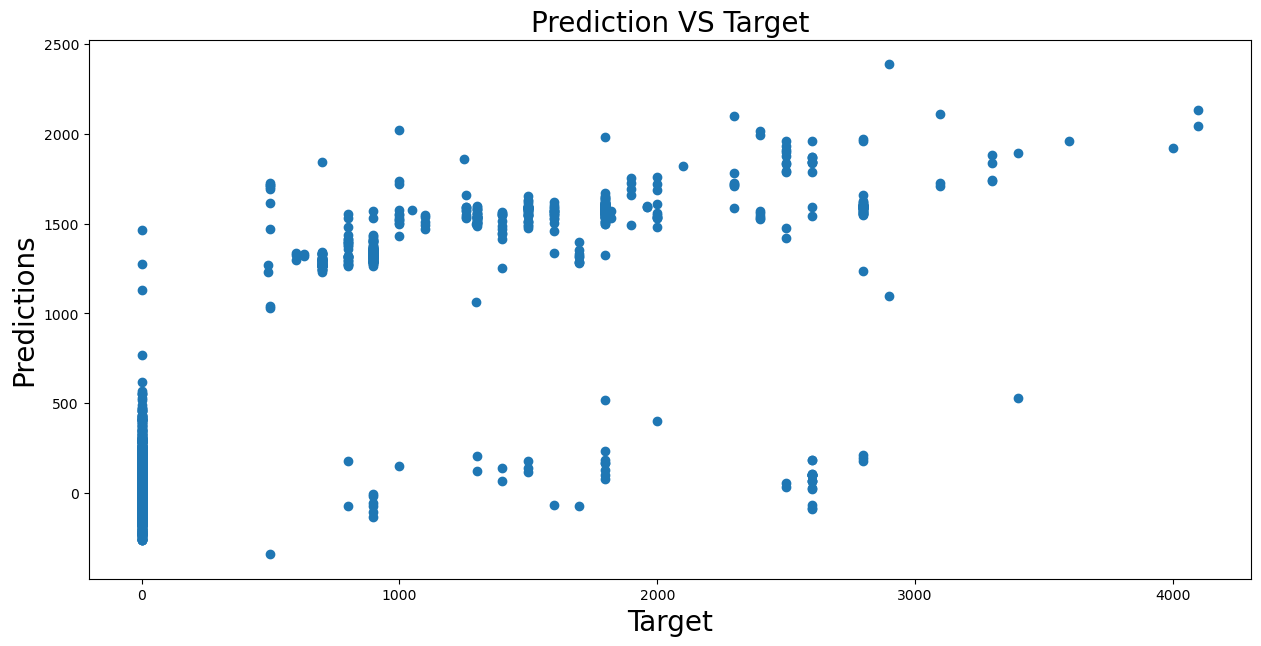

In [52]:
plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Predictions',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

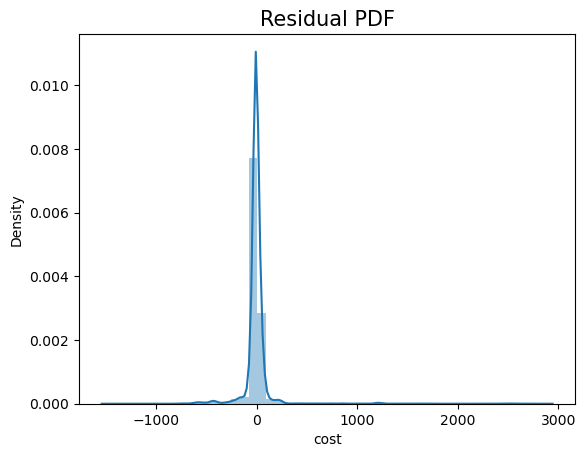

In [53]:
# Other way to judge the model
sns.distplot(y_train-yhat)
plt.title('Residual PDF',fontsize=15)
plt.show()

In [54]:
R2=reg.score(x_train,y_train)
R2

0.7418912994513835

In [55]:
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.7407716930401572

In [56]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values('Weight')

,Features,Weight
49,emailable,-1.430786e+13
55,views_week,-8.699309e+11
20,featured_height,-1.972197e+11
44,price,-8.854985e+02
18,homepage_active,-1.324090e+02
...,...,...
53,analytics_display,2.567549e+02
45,price_original,8.859078e+02
22,verysmall_height,1.972197e+11
54,views,8.699309e+11


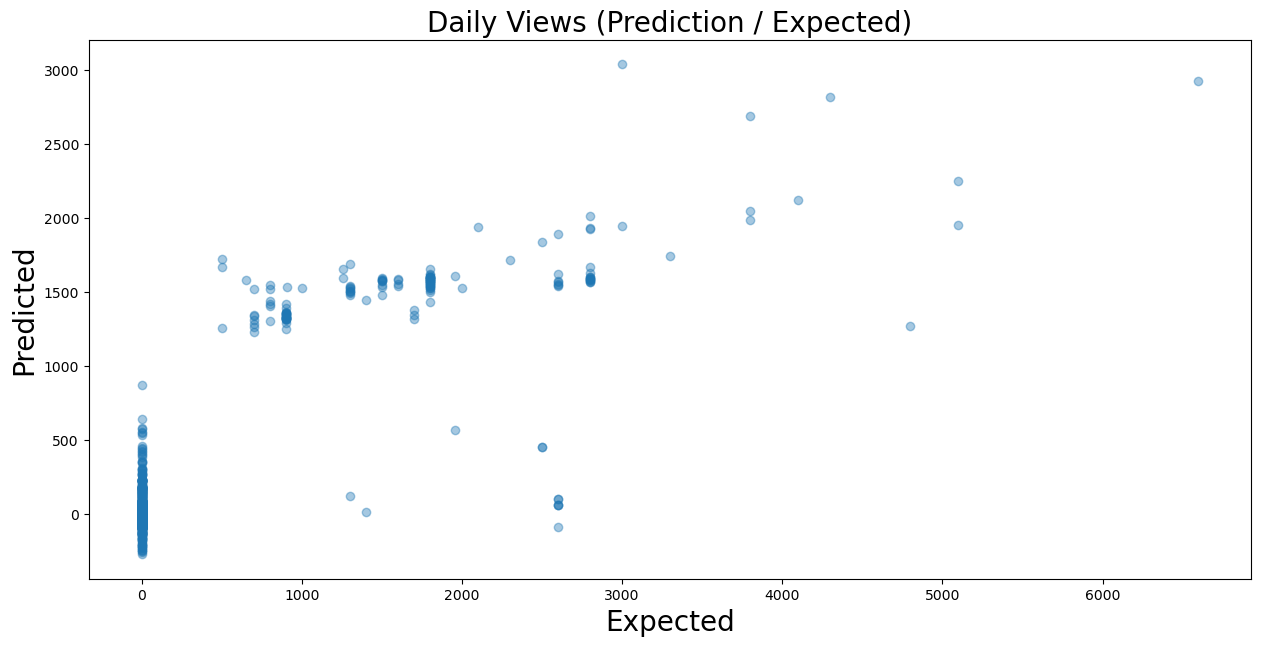

In [57]:
yhat_test=reg.predict(x_test)
plt.figure(figsize=(15,7))
plt.scatter(y_test,yhat_test,alpha=0.4)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)
plt.show()

In [58]:
pf_df=pd.DataFrame({'Predictions':np.exp(yhat_test)})
pf_df.head()

,Predictions
0,1.935824e+02
1,2.225945e+02
2,1.491188e-06
3,1.848682e+14
4,2.985571e+39


In [59]:
y_test=y_test.reset_index(drop=True)
pf_df['Target(expected values)']=np.exp(y_test)

In [60]:
pf_df.head()

,Predictions,Target(expected values)
0,1.935824e+02,1.0
1,2.225945e+02,1.0
2,1.491188e-06,1.0
3,1.848682e+14,1.0
4,2.985571e+39,1.0


# <div class = 'alert alert-info'>Lasso Regression</div>

In [61]:
# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [62]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -28148.40556291252


In [63]:
y_pred_lasso = lasso_regressor.predict(x_test)

Text(0.5, 1.0, 'Daily Views (Prediction / Expected)')

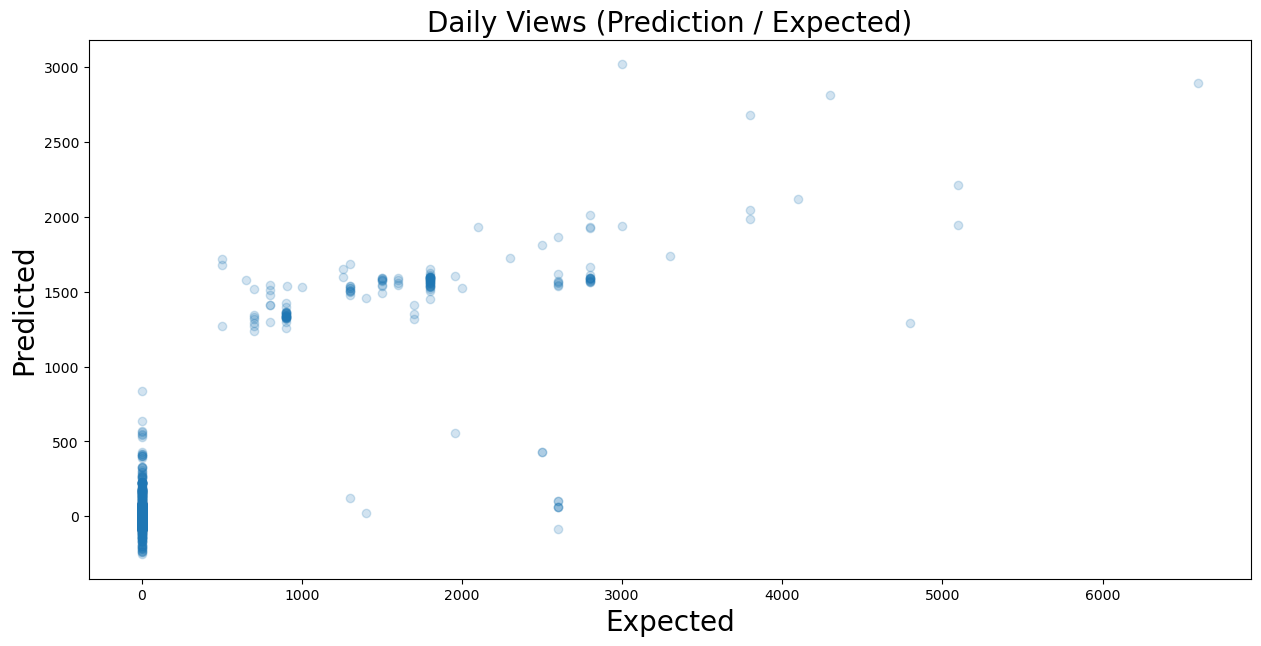

In [64]:
plt.figure(figsize = (15,7))
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_lasso,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

# <div class = 'alert alert-info'>Elastic Net</div>

In [65]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}

Using  {'alpha': 0.01, 'l1_ratio': 0.5}  the negative mean squared error is:  -28172.942498448945


In [67]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [69]:
# yyy_pred = elastic_regressor.predict(X_new)

In [ ]:
# yyy_pred

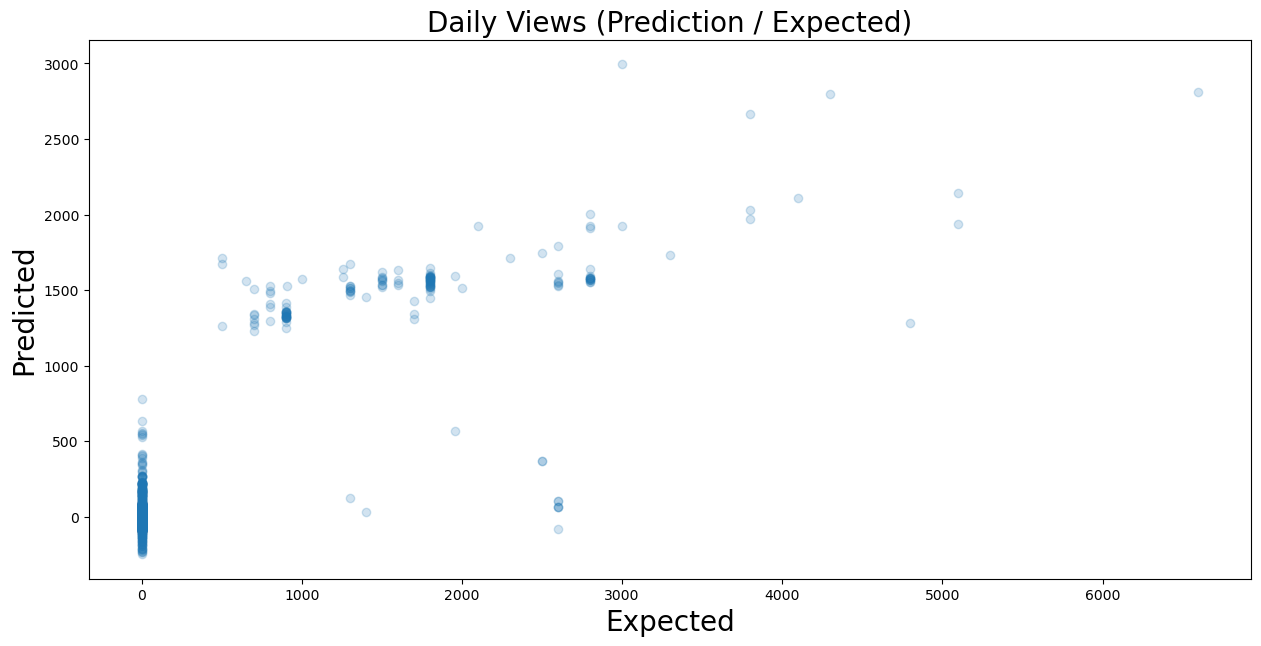

In [70]:
plt.figure(figsize=(15,7))
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_elastic,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)
plt.show()

In [71]:
X.columns

Index(['type_id', 'cat_id', 'active', 'auto_renew', 'ad_sold', 'suspended',
       'hp', 'never_expires', 'renew', 'pre_moderate', 'post_moderate',
       'approved', 'user_active', 'top_ad', 'top_ad_active', 'highlighted',
       'homepage', 'highlighted_active', 'homepage_active', 'urgent_active',
       'featured_height', 'small_height', 'verysmall_height', 'icon_height',
       'watermark_active', 'boost', 'boost_active', 'hppremium',
       'hppremium_active', 'caotw', 'caotw_active', 'umphotos',
       'umphotos_active', 'package_id', 'paying_trader', 'premium_ad', 'photo',
       'num_photos', 'map_on_ad', 'reply_me', 'newsletter',
       'newsletter_third_parties', 'secondary_site', 'urgent', 'price',
       'price_original', 'price2', 'trade', 'new', 'emailable', 'favs',
       'enable_maps', 'lock_map', 'analytics_display', 'views', 'views_week',
       'business_url_click', 'contacts', 'displays', 'displays_hp',
       'displays_hppremium', 'views_photo', 'url_click', 'print

# <div class = 'alert alert-info'> Predictions</div>

In [73]:
X.head()

,type_id,cat_id,active,auto_renew,ad_sold,suspended,hp,never_expires,renew,pre_moderate,post_moderate,approved,user_active,top_ad,top_ad_active,highlighted,homepage,highlighted_active,homepage_active,urgent_active,featured_height,small_height,verysmall_height,icon_height,watermark_active,boost,boost_active,hppremium,hppremium_active,caotw,caotw_active,umphotos,umphotos_active,package_id,paying_trader,premium_ad,photo,num_photos,map_on_ad,reply_me,newsletter,newsletter_third_parties,secondary_site,urgent,price,price_original,price2,trade,new,emailable,favs,enable_maps,lock_map,analytics_display,views,views_week,business_url_click,contacts,displays,displays_hp,displays_hppremium,views_photo,url_click,print_click,print_phone,imported,photos_removed,position,position_cat,email_service_suggestion,performance
0,1,76,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,8,0,1,0,0,0,0,1699500,1699500,1699500,1,0,1,0,0,0,0,11745,11745,0,2,70465,9,0,26830,0,53,17,1,0,0,0,0,1
1,1,76,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,0,0,1,0,0,0,0,1778500,1778500,1778500,1,0,1,0,0,0,0,3109,3109,0,0,53908,0,0,5,0,39,3,1,0,0,0,0,1
2,1,76,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,250,0,0,0,0,0,0,0,1,1,57,1,1,1,5,0,1,0,0,0,0,1249500,1249500,1249500,1,0,1,1,0,0,0,7528,7528,0,3,65337,8,157,21390,0,49,9,1,0,2000,0,0,1
3,1,76,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,0,0,1,0,0,0,0,1689500,1689500,1689500,1,0,1,0,0,0,0,3254,3254,0,0,66459,0,0,22,0,53,5,1,0,2000,0,0,1
4,1,76,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,96,84,81,0,0,0,0,0,0,0,0,1,1,57,1,1,1,6,0,1,0,0,0,0,1289500,1289500,1289500,1,0,1,0,0,0,0,1561,1561,0,2,53046,5,0,2984,0,41,1,1,0,2000,0,0,1


In [78]:
# Save the File

# Lasso Regression 

# Running Grid Search CV

# Cross validation
model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

# Save the model to a file using pickle
filename = 'lasso_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [91]:
# Load the saved model from the pickle file
with open(filename, 'rb') as file:
    model = pickle.load(file)

# Load some new data for prediction
X_new = [[1,  #type_id
          76, #cat_id
          1,  #active
          1,  #auto_renew
          0,  #ad_sold
          0,  #suspended
          1,  #hp
          1,  #never_expires
          0,  #renew
          0,  #pre_moderate
          1,  #post_moderate
          1,  #approved
          1,  #user_active
          1,  #top_ad
          1,  #top_ad_active
          1,  #highlighted
          1,  #homepage
          1,  #highlighted_active
          1,  #homepage_active
          0,  #urgent_active
          96, #featured_height
          84, #small_height
          81, #verysmall_height
          0,  #icon_height
          0,  #watermark_active
          1,  #boost
          0,  #boost_active
          1,  #hppremium
          1,  #hppremium_active
          0,  #caotw
          0,  #caotw_active
          1,  #umphotos
          1,  #umphotos_active
          57, #package_id
          1,  #paying_trader
          1,  #premium_ad
          1,  #photo
          5,  #num_photos
          1,  #map_on_ad
          1,  #reply_me
          0,  #newsletter
          0,  #newsletter_third_parties
          0,  #secondary_site
          0,  #urgent
          0,  #price
          0,  #price_original
          0,  #price2
          1,  #trade
          0,  #new
          1,  #emailable
          0,  #favs
          1,  #enable_maps
          0,  #lock_map
          1,  #analytics_display
          # --------------------------------------------------------------- Do not change below values
          0,  #views DEFAULT
          0,  #views_week DEFAULT
          0,  #business_url_click DEFAULT
          0,  #contacts DEFAULT
          0,  #displays DEFAULT
          0,  #displays_hp DEFAULT
          0,  #displays_hppremium DEFAULT
          0,  #views_photo DEFAULT
          0,  #url_click DEFAULT
          0,  #print_click DEFAULT
          0,  #print_phone DEFAULT
          0,   #imported DEFAULT
          0,  #photos_removed DEFAULT
          0,  #position DEFAULT
          0,  #position_cat DEFAULT
          0,  #email_service_suggestion DEFAULT
          0  #performance DEFAULT
         ]]

# Fit the loaded model on some training data
model.fit(x_train, y_train)

# Predict the output for the new data using the loaded model
y_pred = lasso_regressor.predict(X_new)

print(y_pred)

[1597.04574664]
